# Thad Hoskins

# HW7 (total points 6)

# Use pandas API to finish problem in this notebook.
Total points 6

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set_theme(style="whitegrid")

In [2]:
from io import BytesIO
from zipfile import ZipFile
import requests
import re

**Let download movie lense dataset [MovieLens](https://grouplens.org/datasets/movielens/) and extract zip file using various python packages**

http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [3]:
r = requests.get("http://files.grouplens.org/datasets/movielens/ml-latest-small.zip")
print(r.status_code)
zipfile = ZipFile(BytesIO(r.content))

200


In [4]:
zipfile.extractall()

In [5]:
! ls ml-latest-small/

README.txt  links.csv  movies.csv  ratings.csv	tags.csv


In [6]:
! head  ./ml-latest-small/movies.csv

**It is a csv file.** We can use pandas read_csv to read this file into pandas DataFrame

In [7]:
# lets read movies.csv file
movie = pd.read_csv('./ml-latest-small/movies.csv')
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Q1 (.25 point) Check if any columns is null

In [8]:
movie.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

# Q 2 (.25 point) Check datatype of columns

In [9]:
movie.dtypes

movieId     int64
title      object
genres     object
dtype: object

# Q3 (.5 point) Using *str* on  series genres, build following  unique_genere set. It should contain all the unique genres from genres column. Print unique genres too.



In [10]:
unique_genre = set(",".join(movie.genres.str.split("|").str.join(",").tolist()).split(","))
unique_genre

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

# Q 4 (1 point) build columns for different genres with value True or False based on whether a  genre is present or not in an observation?



In [11]:
for g in unique_genre:
    movie[g] = movie.genres.str.contains(g)

movie

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,movieId,title,genres,Crime,Thriller,Children,Sci-Fi,Horror,Romance,Mystery,...,(no genres listed),Adventure,Documentary,Western,War,Drama,Comedy,IMAX,Musical,Fantasy
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,False,False,True,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
1,2,Jumanji (1995),Adventure|Children|Fantasy,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
2,3,Grumpier Old Men (1995),Comedy|Romance,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False,False,False,False,False,True,False,...,False,False,False,False,False,True,True,False,False,False
4,5,Father of the Bride Part II (1995),Comedy,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,6,Heat (1995),Action|Crime|Thriller,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,7,Sabrina (1995),Comedy|Romance,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
7,8,Tom and Huck (1995),Adventure|Children,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
8,9,Sudden Death (1995),Action,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,10,GoldenEye (1995),Action|Adventure|Thriller,False,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


# Q5(1 point) Build year column in movie data frame. Year are embedded in title columns




Python regular expression  package **re** is very useful tool for text data handling.  This excercise is a very primitive use of it.


note
- . mean any character
- *. means "0 or more instances of the preceding regex token
- \[ matches a literal [ character
- [A-Za-z0-9] digits and lower, upper case, I think same as \w+
- '+' matches one more more times
- \d Matches any decimal digit

In [12]:
movie["year"] = movie.title.str.extract(r'\((\d{4})\)')

In [13]:
movie = movie.dropna(subset=["year"], how='any')

# Q6.(.5 point) Using seaborn, plot a bar plot of frequency number of movies per year. Do you see any trend?


In [14]:
movies_per_year = pd.DataFrame(movie.year.fillna(0).astype(int).value_counts().sort_index())
movies_per_year.columns = ["number"]
movies_per_year.head(10)

,number
1902,1
1903,1
1908,1
1915,1
1916,4
1917,1
1919,1
1920,2
1921,1
1922,1


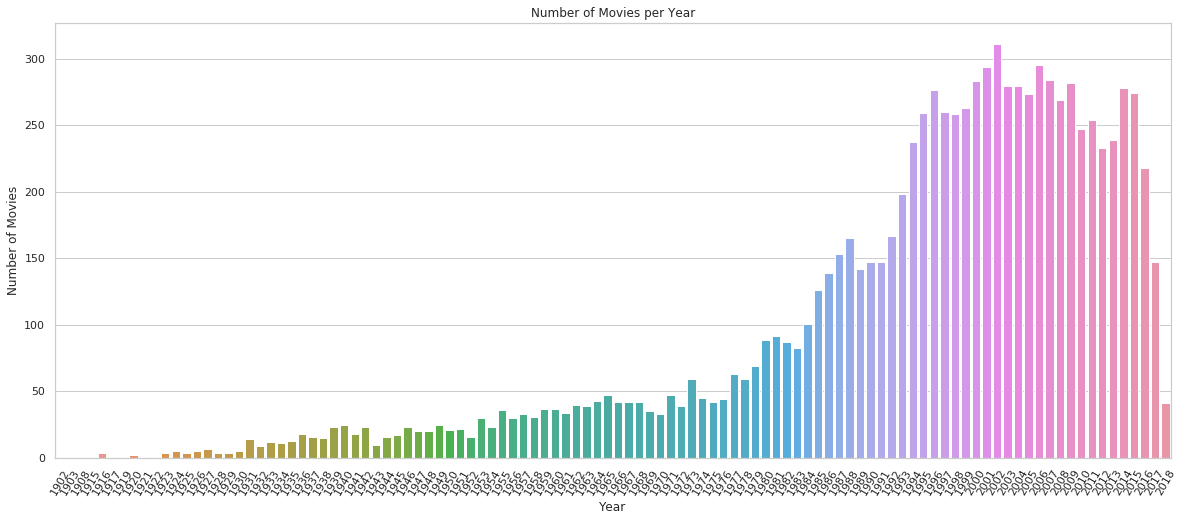

In [15]:
f, ax = plt.subplots(figsize=(20, 8))

sb.set_color_codes("pastel")
sb.barplot(x=movies_per_year.index, y="number", data=movies_per_year)
ax.set(ylabel="Number of Movies",
       xlabel="Year", title="Number of Movies per Year")
ax.set_xticklabels(labels=movies_per_year.index, rotation=60)
plt.show()

The number of movies made per year seems to increase. However, in 2016, the trend seems to drop off to early 1990's levels, at least with the given data. 

# Q7.(1 point) Using matplotlib, plot total number of movies in different genres over the year. Plot should have proper title, axis labels and legends.

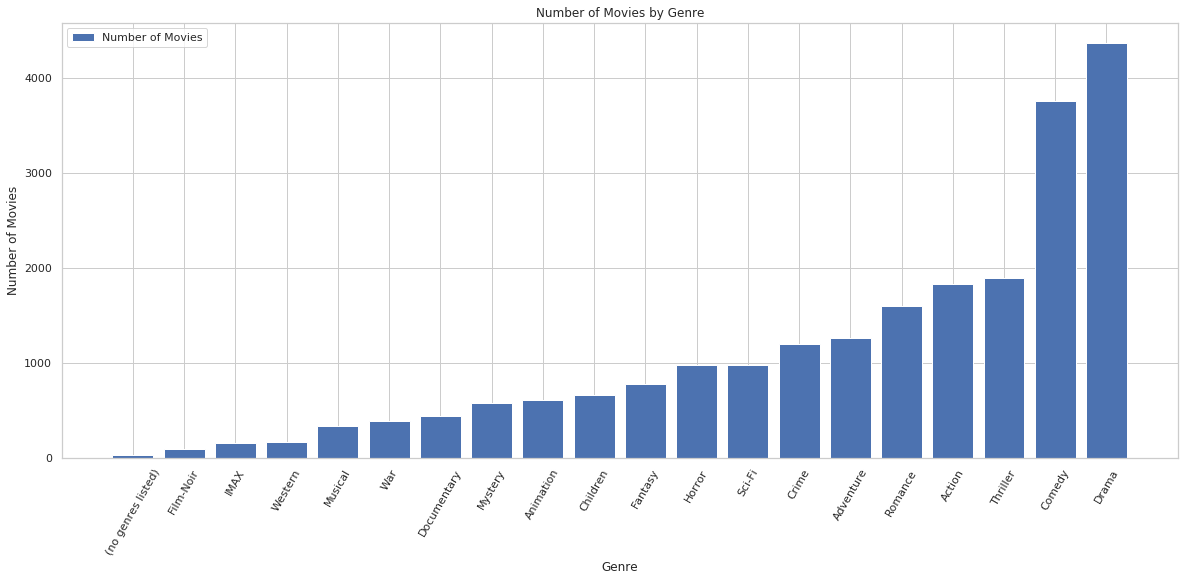

In [16]:
keep_cols = movie[movie.columns.difference(["movieId", "genres", "year", "title", "movie_title"])].columns

movie_genres = pd.DataFrame(movie[keep_cols].sum(axis=0), columns=["number"]).sort_values(by="number")
my_cmap = plt.get_cmap("winter")

plt.subplots(figsize=(20, 8))
# plt.scatter(movie_genres.index, movie_genres.number, c=movie_genres.number, cmap=my_cmap, alpha =0.75)
plt.bar(movie_genres.index, movie_genres.number)
plt.title("Number of Movies by Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.legend(["Number of Movies"])
ax = plt.gca()
ax.set_xticklabels(labels=movie_genres.index, rotation=60)
plt.show()

# Q 8 (.5 point) Build a *movie_title* column containing  the title of the movie(It should not contain year). Drop the original *title* columns. Display final movie dataFrame too.

In [17]:
movie["movie_title"] = movie.title.str.replace(r'\((\d{4})\)', '').str.strip()
movie.drop(["title"], inplace=True, axis=1)
movie

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,movieId,genres,Crime,Thriller,Children,Sci-Fi,Horror,Romance,Mystery,Animation,...,Documentary,Western,War,Drama,Comedy,IMAX,Musical,Fantasy,year,movie_title
0,1,Adventure|Animation|Children|Comedy|Fantasy,False,False,True,False,False,False,False,True,...,False,False,False,False,True,False,False,True,1995,Toy Story
1,2,Adventure|Children|Fantasy,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,1995,Jumanji
2,3,Comedy|Romance,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,1995,Grumpier Old Men
3,4,Comedy|Drama|Romance,False,False,False,False,False,True,False,False,...,False,False,False,True,True,False,False,False,1995,Waiting to Exhale
4,5,Comedy,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,1995,Father of the Bride Part II
5,6,Action|Crime|Thriller,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1995,Heat
6,7,Comedy|Romance,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,1995,Sabrina
7,8,Adventure|Children,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1995,Tom and Huck
8,9,Action,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1995,Sudden Death
9,10,Action|Adventure|Thriller,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1995,GoldenEye


# Q 9(1 point) Using seaborn, plot average number of words in a movie name over the years in different genres. Write your observation in no more than 2 lines.

In [18]:
genre_cols = movie[movie.columns.difference(["movieId", "genres", "year", "title", "movie_title"])].columns
df = pd.DataFrame([[col, movie[movie[col]==True]
                    .apply(lambda x : 
                           len(x['movie_title'].split(" ")), axis=1)
                    .values.mean()]
                   for col in genre_cols], 
                  columns=["genre", "mean_words_in_title"]).sort_values(by="mean_words_in_title")
df

,genre,mean_words_in_title
17,Thriller,2.869979
10,Film-Noir,2.908046
14,Mystery,3.106457
13,Musical,3.125749
11,Horror,3.147239
8,Drama,3.161964
6,Crime,3.184320
19,Western,3.203593
16,Sci-Fi,3.237219
15,Romance,3.261278


In [19]:
# Verifying that the above is correct
m_genre = "Animation"
num_movies = len(movie[movie[m_genre]==True])
words = 0
for m in movie[movie[m_genre]==True].movie_title.str.split(" "):
       words += len(m)
f"{m_genre}: {words/num_movies}"

'Animation: 4.4075286415711945'

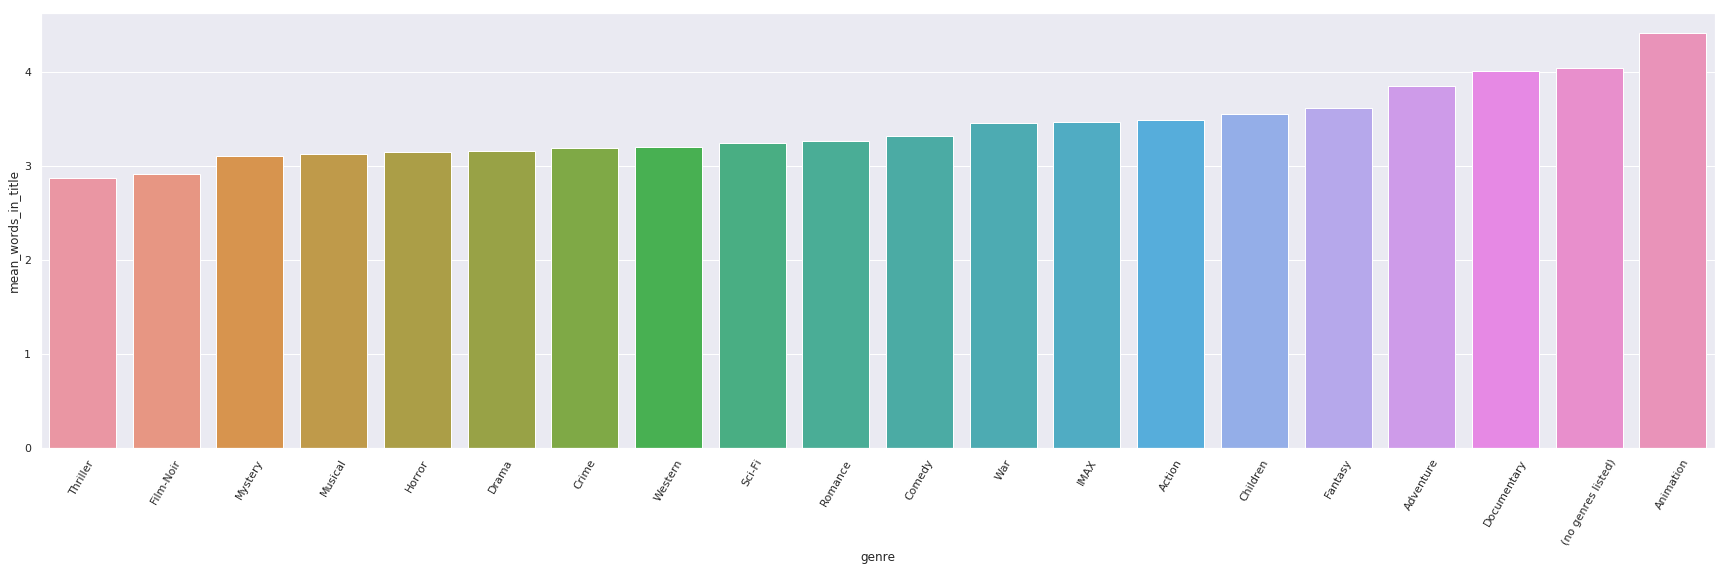

In [20]:
sb.set(rc={"figure.figsize":(30, 8)})
avg_title = sb.barplot(x=df.genre, y=df.mean_words_in_title, data=df)
avg_title.set_xlabel ="Year"
avg_title.set_ylabel = "Average Length of Movie Title"
avg_title.set_title ="Average Length of Movie Title by Year"
ax = plt.gca()
ax.set_xticklabels(labels=df.genre, rotation=60)
plt.show()

The range of average words per title is not staggering. Thriller has the most concise titles with 2.87 words, while animation is the most with 4.4075 words. Animation is nearly half a word more than "no genre", a large jump given the shape of the curve.